# Introduction


---



A ‘brain stroke’ is an event and condition that many of us know little about, but each one of us has the capacity to prevent and detect. When the brain is deprived of blood and the oxygen it carries, or when bleeding inundates surrounding tissue and causes the brain to swell, its effective operation becomes compromised. Both incidents can cause lasting vision problems, seizures, fatigue, loss of speech, memory loss, and paralysis among other adverse effects. If severe enough, they can also cause death.

In low-and middle-income countries, which include those of the WHO South-East Asia Region, over 11 million strokes occur every year. This causes 4 million deaths annually, and leaves approximately 30% of survivors seriously disabled. For the 70% of survivors who recover, the likelihood of suffering further strokes is greatly increased.

*Source:* https://www.who.int/southeastasia/news/detail/29-10-2016-prevent-brain-stroke


---
**Objective**

The healthcare system should be keen on using analytics to predict the likelihood of stroke in individuals. A higher stroke risk means increased costs for insurance companies, more preventive care efforts from healthcare providers, and the need for additional resources from policymakers.

Our goals include the early detection of individuals at high risk of stroke, the effective allocation of healthcare resources, and the development of personalized care plans tailored to individual risk factors.

---
**Result**

insert best model with scores


---
**Dataset Source**: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# EDA

### 1.1 Importing Necessary Libraries


---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### 1.2 Loading Dataset


---



In [ ]:
from google.colab import files
import io

uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
filename = next(iter(uploaded))
data = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))

### 1.3 General Information about the Dataset


---



> The code below generates a complete profiling report of the data, which can be used to speed up EDA process.

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f05e0d111a2caa32eec3a1eea104a9f1348c99265fa2008a58c7bf5166c991d1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data,title="Stroke Dataset")

profile.to_file("stroke_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.shape

(5110, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# checking for duplicated rows in the dataset
data[data.duplicated()].shape[0]

0

---> There are no duplicated rows in the dataset.


---



In [ ]:
#  identifing and counting the number of missing (NaN) values
data.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


---> bmi column has 201 null values.


---




In [ ]:
# a value of ‘all’ so that categorical features are also included

data.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


###1.4 Univariate Analysis & Bivariate Analysis with Stroke
---



###1.4.1 *Stroke*

In [ ]:
data['stroke'].value_counts()

,count
stroke,
0,4861
1,249


---> Highly imbalanced.


---



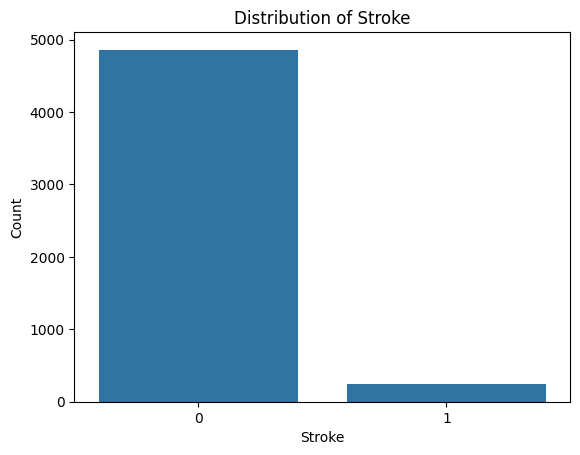

In [ ]:
# Plotting the distribution of the target variable 'stroke'
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


---> The number of cases of not having a stroke is significantly higher than that of having one.

---> Accuracy alone might not be meaningful due to the imbalance.

---



###1.4.2 *Gender*


---



In [ ]:
# Counting the occurrences of each gender
data['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


---> The "Other" category is an outlier and not necessary here as it only one case.


---



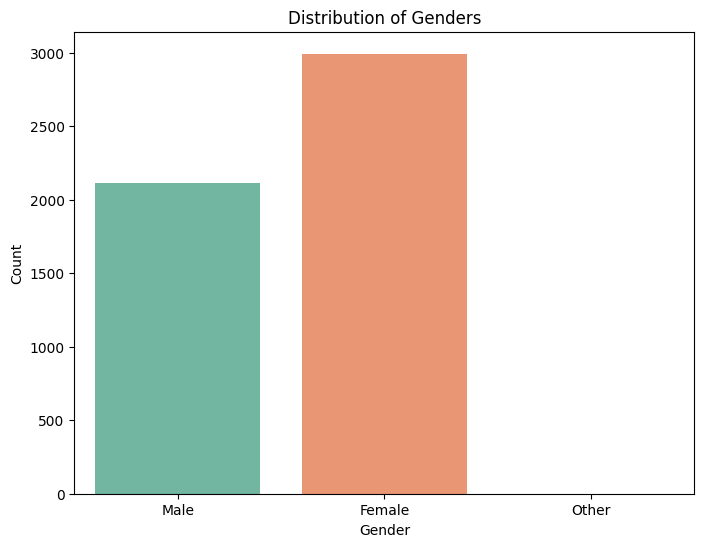

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary
sns.countplot(x='gender', data=data, palette='Set2')  # 'Set2' is a color palette
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

In [ ]:
# Counting of strokes by gender
data.groupby('gender')['stroke'].value_counts().unstack()

stroke,0,1
gender,,
Female,2853.0,141.0
Male,2007.0,108.0
Other,1.0,NaN


---> Further confirmation that we can remove the lone case of the other gender as it is part of the major class.


---



In [ ]:
#creating the variable to plot
stroke_counts = data.groupby('gender')['stroke'].value_counts().unstack()

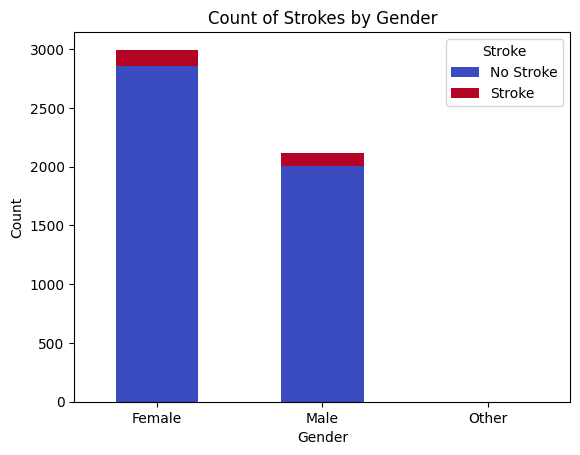

In [ ]:
# Plotting
stroke_counts.plot(kind='bar', stacked=True, rot=0, colormap='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Strokes by Gender')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

---> The stacked bar plot to visualize the count of strokes by gender.


---



###1.4.3 *Age*


---



In [ ]:
# Counting the occurrences of different ages
data['age'].value_counts()

,count
age,
78.00,102
57.00,95
52.00,90
54.00,87
51.00,86
...,...
1.40,3
0.48,3
0.16,3


In [ ]:
# Counting of strokes by age
data.groupby('age')['stroke'].value_counts().unstack()

stroke,0,1
age,,
0.08,2.0,NaN
0.16,3.0,NaN
0.24,5.0,NaN
0.32,5.0,NaN
0.40,2.0,NaN
...,...,...
78.00,81.0,21.0
79.00,68.0,17.0
80.00,53.0,17.0


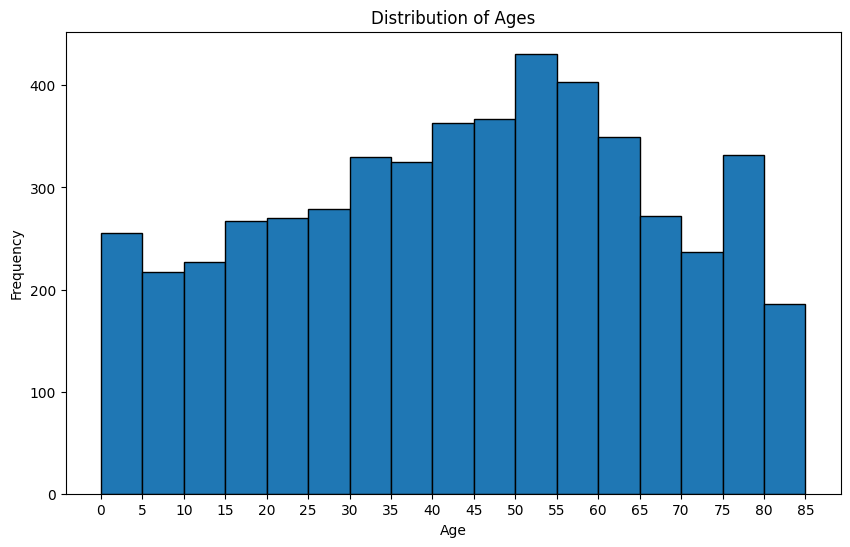

In [ ]:
# Plotting a histogram of 'age'
bins = range(0, int(data['age'].max()) + 6, 5)

# Plotting a histogram of 'age' with specified bins
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=bins, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.xticks(bins)
plt.show()

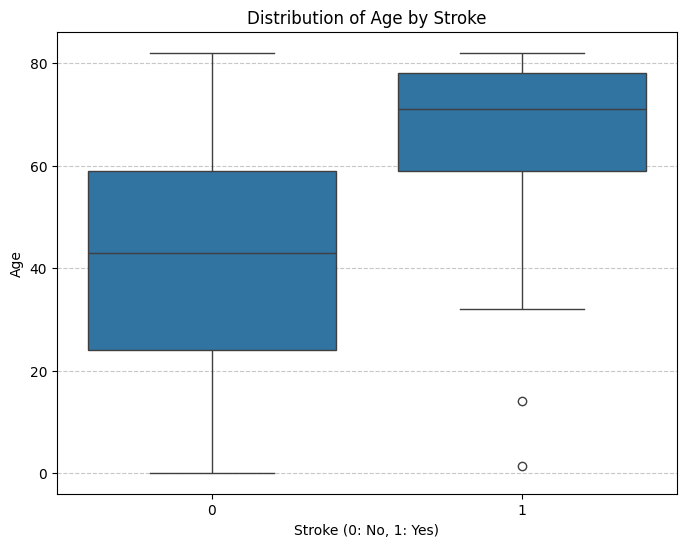

In [ ]:
# Creating a box plot to compare the distribution of age by stroke
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=data)
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Distribution of Age by Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---> The box plot shows the median, quartiles, and potential outliers in the distribution of age for individuals with stroke (stroke=1) and without stroke (stroke=0).


---



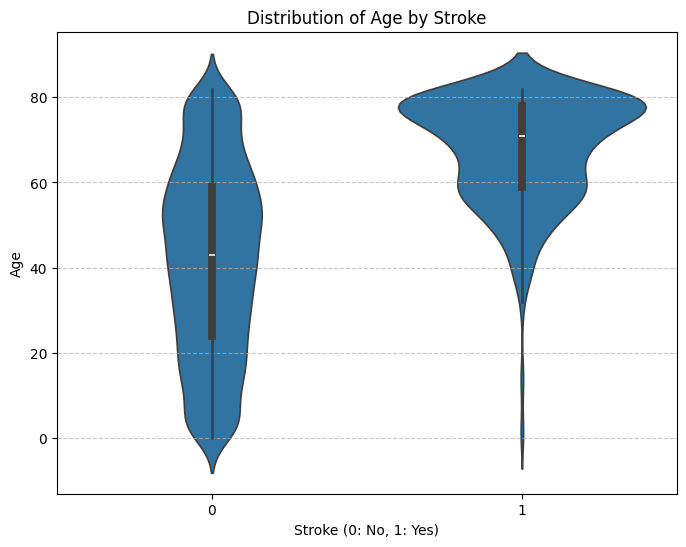

In [ ]:
# Create a violin plot to compare the distribution of age by stroke
plt.figure(figsize=(8, 6))
sns.violinplot(x='stroke', y='age', data=data)
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Distribution of Age by Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---> The violin plot shows the kernel density estimation (probability density estimation) of the age distribution for each stroke group.


---



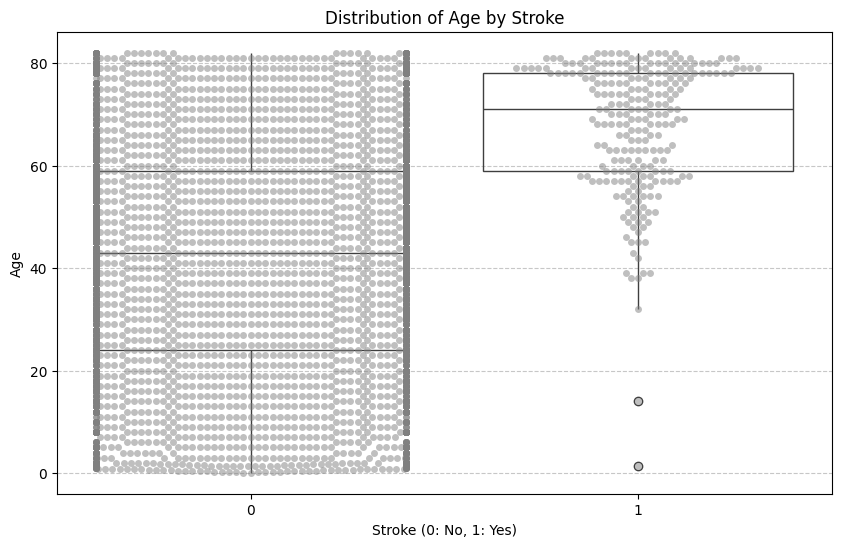

In [ ]:
# Create a combination plot (swarm plot + box plot) to compare age distribution by stroke
plt.figure(figsize=(10, 6))
sns.swarmplot(x='stroke', y='age', data=data, color='grey', alpha=0.5)
sns.boxplot(x='stroke', y='age', data=data, showcaps=False, boxprops={'facecolor':'None'})
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Distribution of Age by Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---> This combined plot shows the distribution of ages using a swarm plot (individual data points) overlaid with a box plot for each stroke group.


---



###1.4.4 *Hypertension*


---



In [ ]:
# Counting the occurrences of hypertension
data['hypertension'].value_counts()

,count
hypertension,
0,4612
1,498


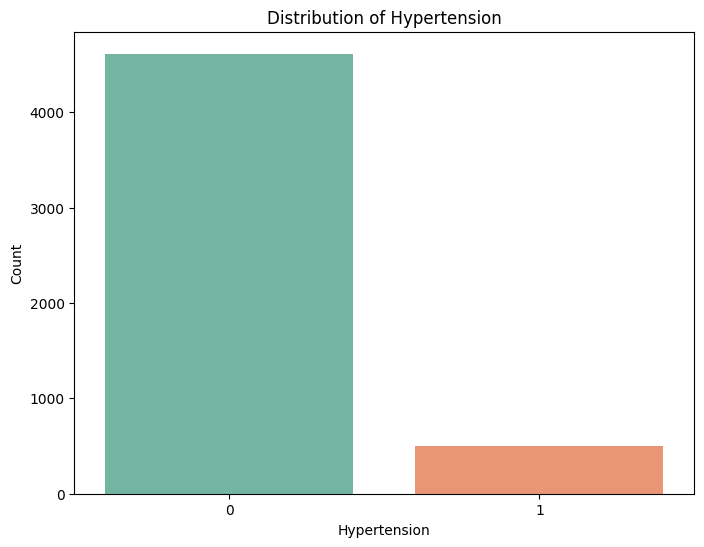

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', data=data, palette='Set2')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Distribution of Hypertension')
plt.show()

In [ ]:
# Counting of strokes by gender
data.groupby('hypertension')['stroke'].value_counts().unstack()

stroke,0,1
hypertension,,
0,4429,183
1,432,66


In [ ]:
#creating the variable to plot
stroke_counts_hypertension = data.groupby('hypertension')['stroke'].value_counts().unstack()

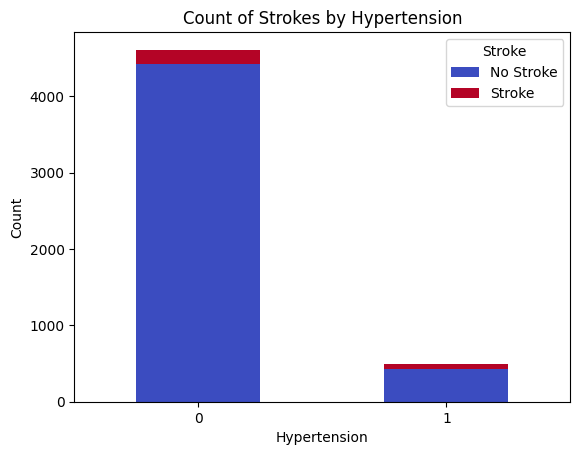

In [ ]:
# Plotting
stroke_counts_hypertension.plot(kind='bar', stacked=True, rot=0, colormap='coolwarm')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Count of Strokes by Hypertension')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

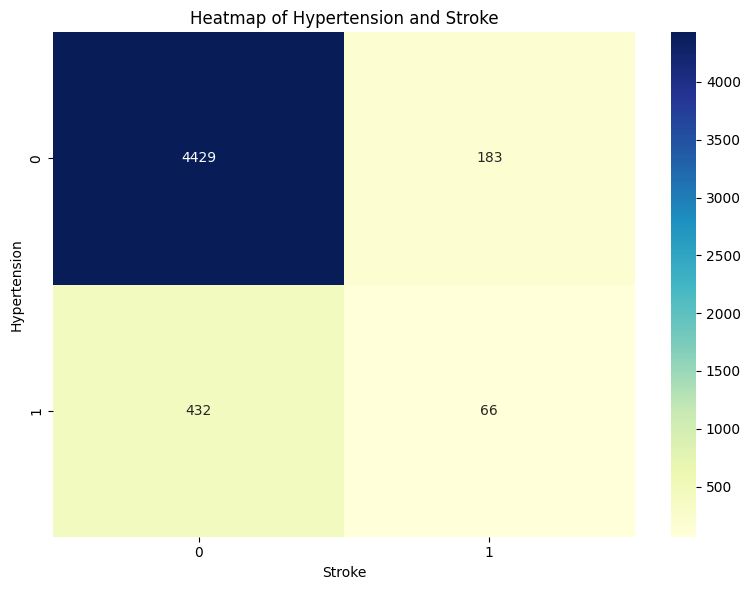

In [ ]:
# Calculate counts
cross_tab = pd.crosstab(data['hypertension'], data['stroke'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# Customize chart
plt.title('Heatmap of Hypertension and Stroke')
plt.xlabel('Stroke')
plt.ylabel('Hypertension')

# Show plot
plt.tight_layout()
plt.show()


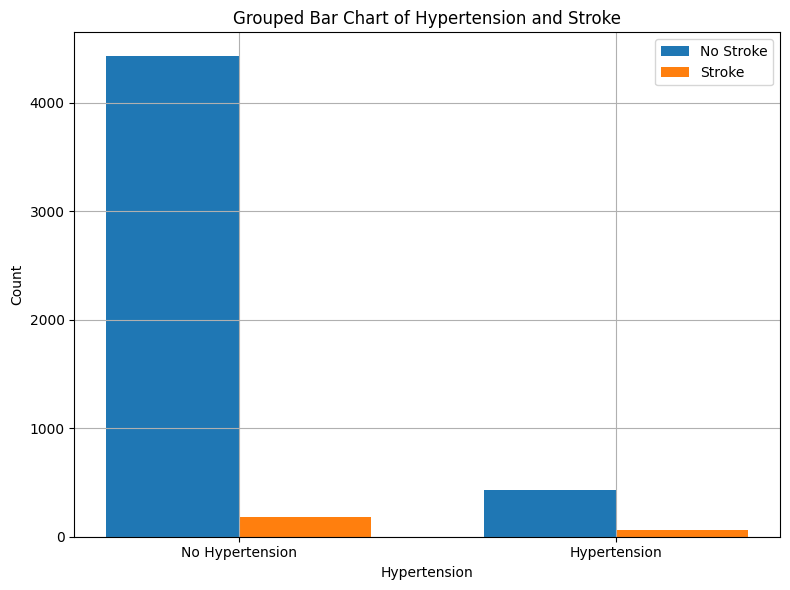

In [ ]:
# Calculate counts
cross_tab = pd.crosstab(data['hypertension'], data['stroke'])

# Plotting
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(cross_tab.index))

plt.bar(index - bar_width/2, cross_tab[0], bar_width, label='No Stroke')
plt.bar(index + bar_width/2, cross_tab[1], bar_width, label='Stroke')

# Customize chart
plt.title('Grouped Bar Chart of Hypertension and Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks(index, ['No Hypertension', 'Hypertension'])
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

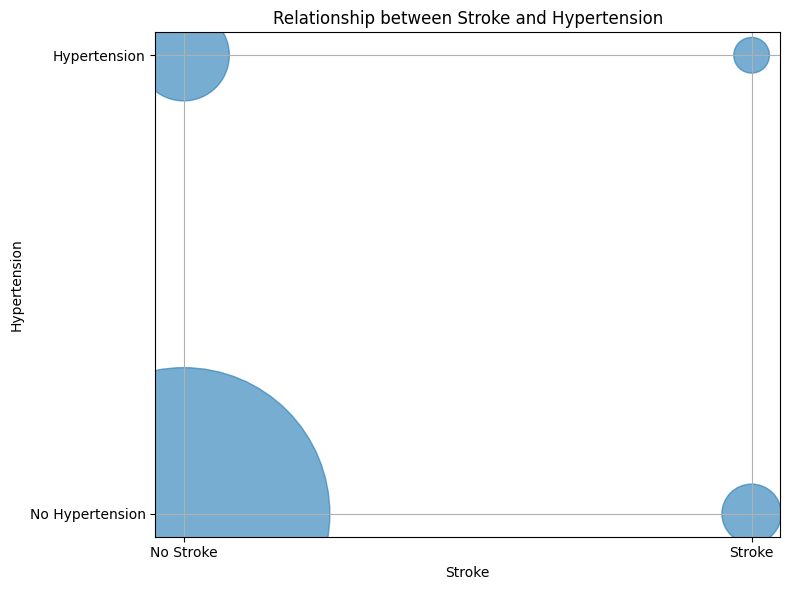

In [ ]:
# Data
stroke = [0, 1]
hypertension = [0, 1]
counts = [
    [4429, 183],  # No Hypertension
    [432, 66]   # Hypertension
]

# Prepare data for scatter plot
x = []
y = []
sizes = []

for i in range(len(hypertension)):
    for j in range(len(stroke)):
        x.append(stroke[j])
        y.append(hypertension[i])
        sizes.append(counts[i][j] * 10)
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=sizes, alpha=0.6)

# Customize chart
plt.title('Relationship between Stroke and Hypertension')
plt.xlabel('Stroke')
plt.ylabel('Hypertension')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.yticks([0, 1], ['No Hypertension', 'Hypertension'])
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

###1.4.5 *Heart Disease*


---



In [ ]:
# Counting the occurrences
data['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

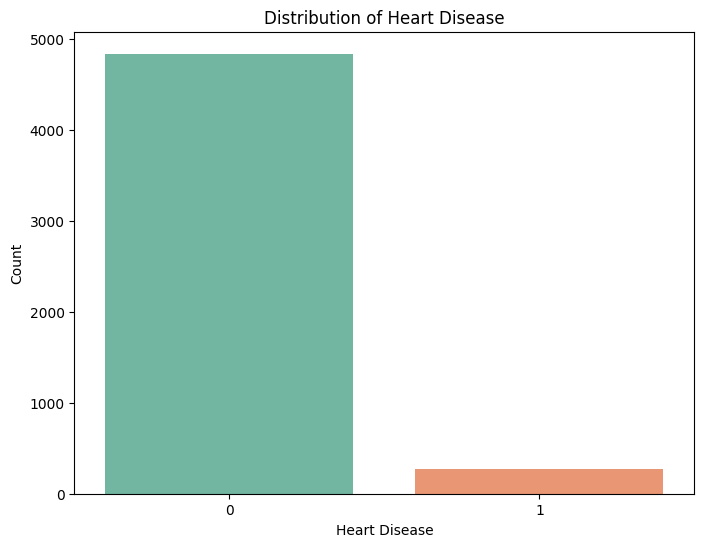

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary
sns.countplot(x='heart_disease', data=data, palette='Set2')  # 'Set2' is a color palette
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')
plt.show()

In [ ]:
# Counting of strokes by gender
data.groupby('heart_disease')['stroke'].value_counts().unstack()

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


In [ ]:
#creating the variable to plot
stroke_counts_heart_disease = data.groupby('heart_disease')['stroke'].value_counts().unstack()

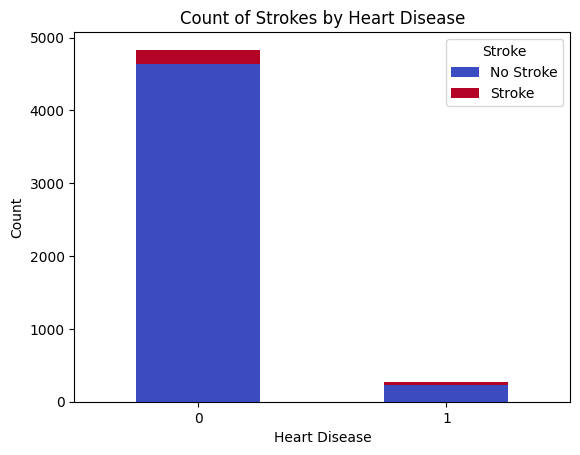

In [ ]:
# Plotting
stroke_counts_heart_disease.plot(kind='bar', stacked=True, rot=0, colormap='coolwarm')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Count of Strokes by Heart Disease')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

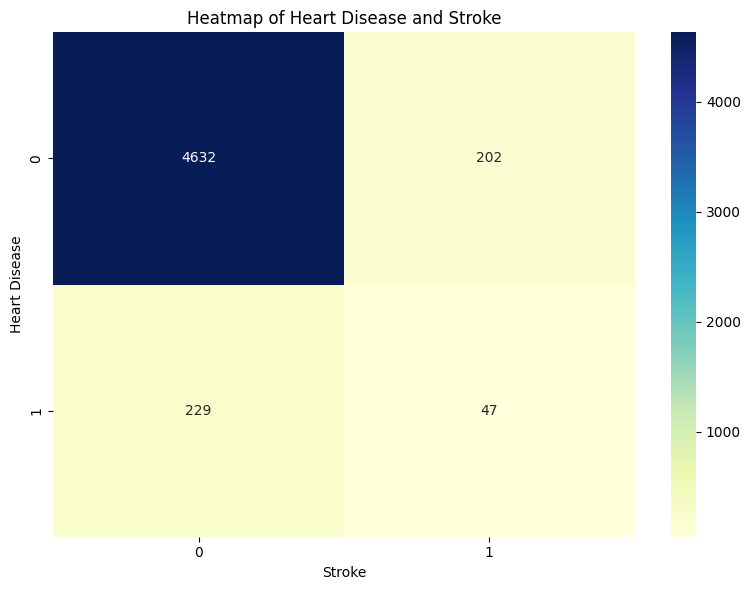

In [ ]:
# Calculate counts
cross_tab = pd.crosstab(data['heart_disease'], data['stroke'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# Customize chart
plt.title('Heatmap of Heart Disease and Stroke')
plt.xlabel('Stroke')
plt.ylabel('Heart Disease')

# Show plot
plt.tight_layout()
plt.show()

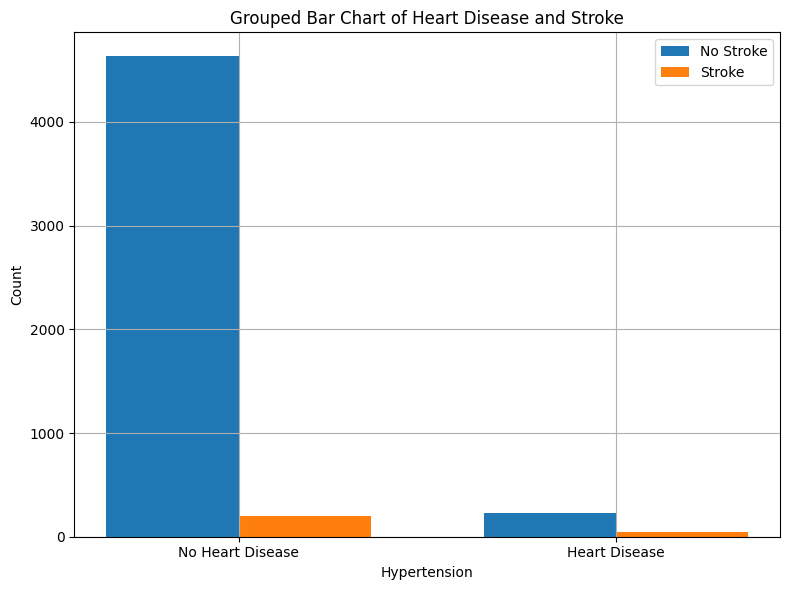

In [ ]:
# Calculate counts
cross_tab = pd.crosstab(data['heart_disease'], data['stroke'])

# Plotting
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(cross_tab.index))

plt.bar(index - bar_width/2, cross_tab[0], bar_width, label='No Stroke')
plt.bar(index + bar_width/2, cross_tab[1], bar_width, label='Stroke')

# Customize chart
plt.title('Grouped Bar Chart of Heart Disease and Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks(index, ['No Heart Disease', 'Heart Disease'])
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

###1.4.6 *Ever Married*


---




In [ ]:
# Counting the occurrences
data['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

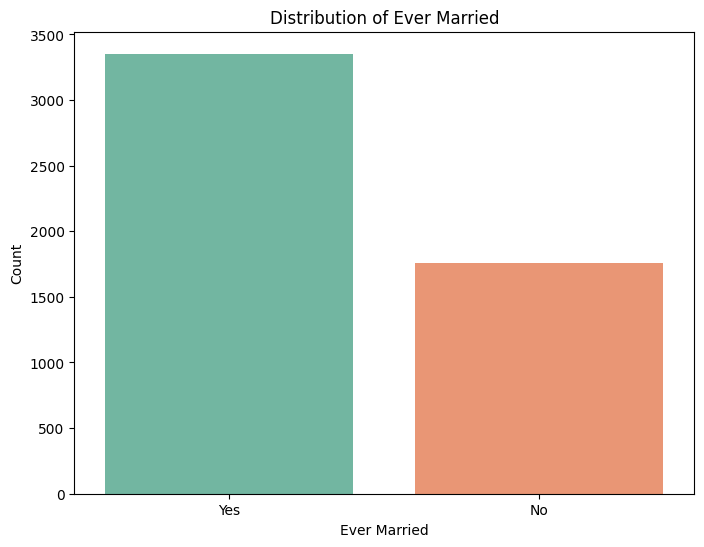

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', data=data, palette='Set2')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.title('Distribution of Ever Married')
plt.show()

In [ ]:
# Counting of strokes by ever married
data.groupby('ever_married')['stroke'].value_counts().unstack()

stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220


In [ ]:
#creating the variable to plot
stroke_counts_ever_married = data.groupby('ever_married')['stroke'].value_counts().unstack()

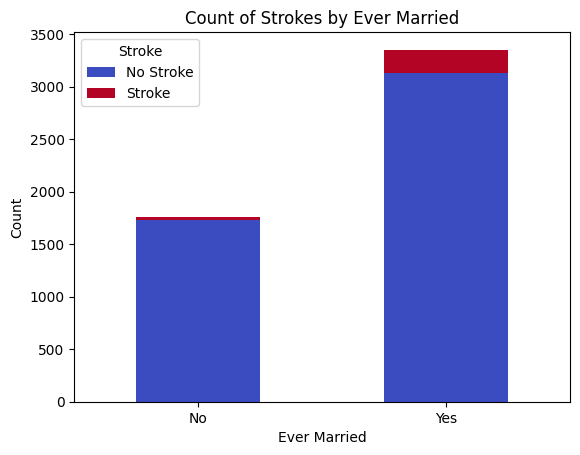

In [ ]:
# Plotting
stroke_counts_ever_married.plot(kind='bar', stacked=True, rot=0, colormap='coolwarm')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.title('Count of Strokes by Ever Married')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

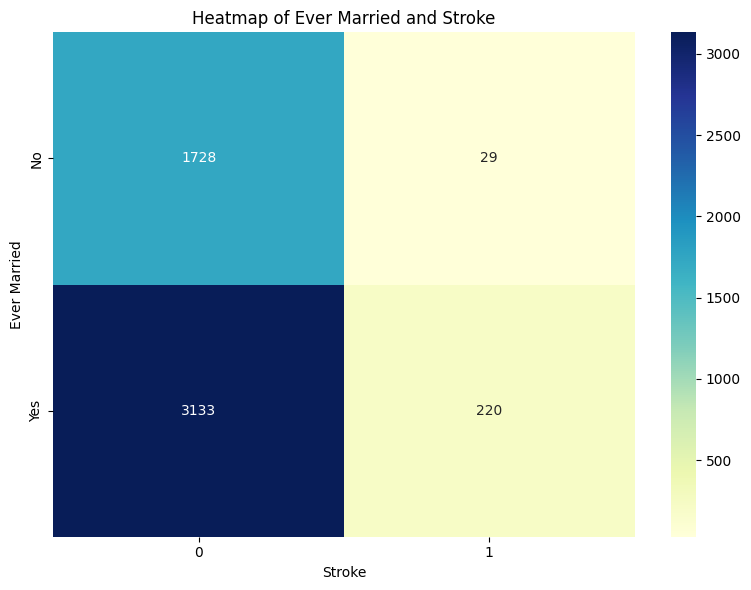

In [ ]:
# Calculate counts
cross_tab = pd.crosstab(data['ever_married'], data['stroke'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# Customize chart
plt.title('Heatmap of Ever Married and Stroke')
plt.xlabel('Stroke')
plt.ylabel('Ever Married')

# Show plot
plt.tight_layout()
plt.show()

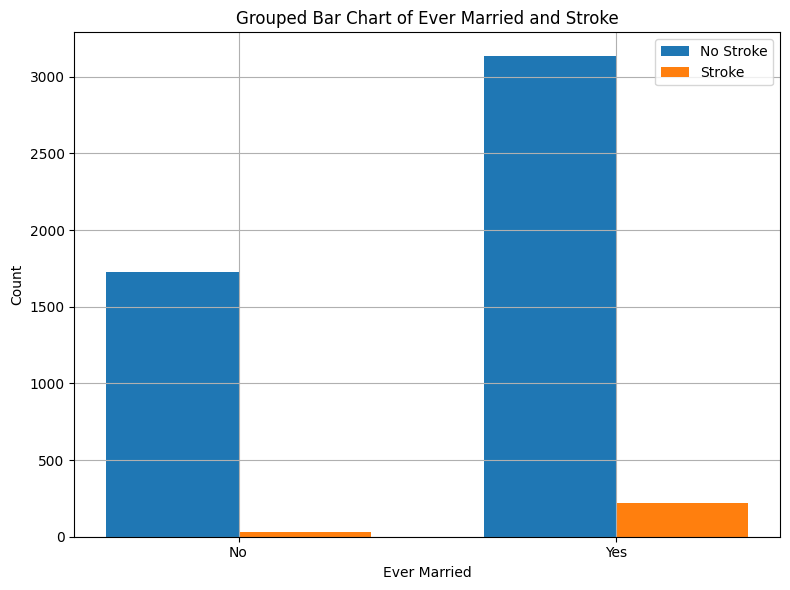

In [ ]:
# Calculate counts
cross_tab = pd.crosstab(data['ever_married'], data['stroke'])

# Plotting
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(cross_tab.index))

plt.bar(index - bar_width/2, cross_tab[0], bar_width, label='No Stroke')
plt.bar(index + bar_width/2, cross_tab[1], bar_width, label='Stroke')

# Customize chart
plt.title('Grouped Bar Chart of Ever Married and Stroke')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.xticks(index, ['No', 'Yes'])
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

###1.4.7 *Work Type*


---




In [ ]:
# Counting the occurrences
data['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

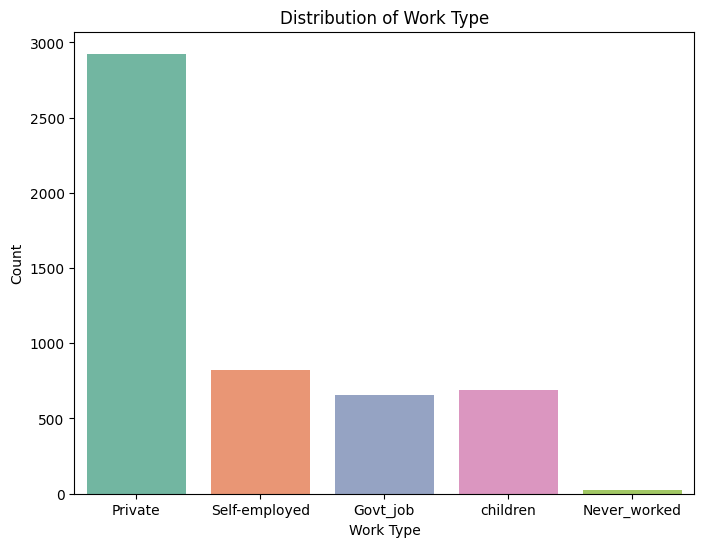

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type', data=data, palette='Set2')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.title('Distribution of Work Type')
plt.show()

In [ ]:
# Counting of strokes by work type
data.groupby('work_type')['stroke'].value_counts().unstack()

stroke,0,1
work_type,,
Govt_job,624.0,33.0
Never_worked,22.0,NaN
Private,2776.0,149.0
Self-employed,754.0,65.0
children,685.0,2.0


In [ ]:
#creating the variable to plot
stroke_counts_work_type = data.groupby('work_type')['stroke'].value_counts().unstack()

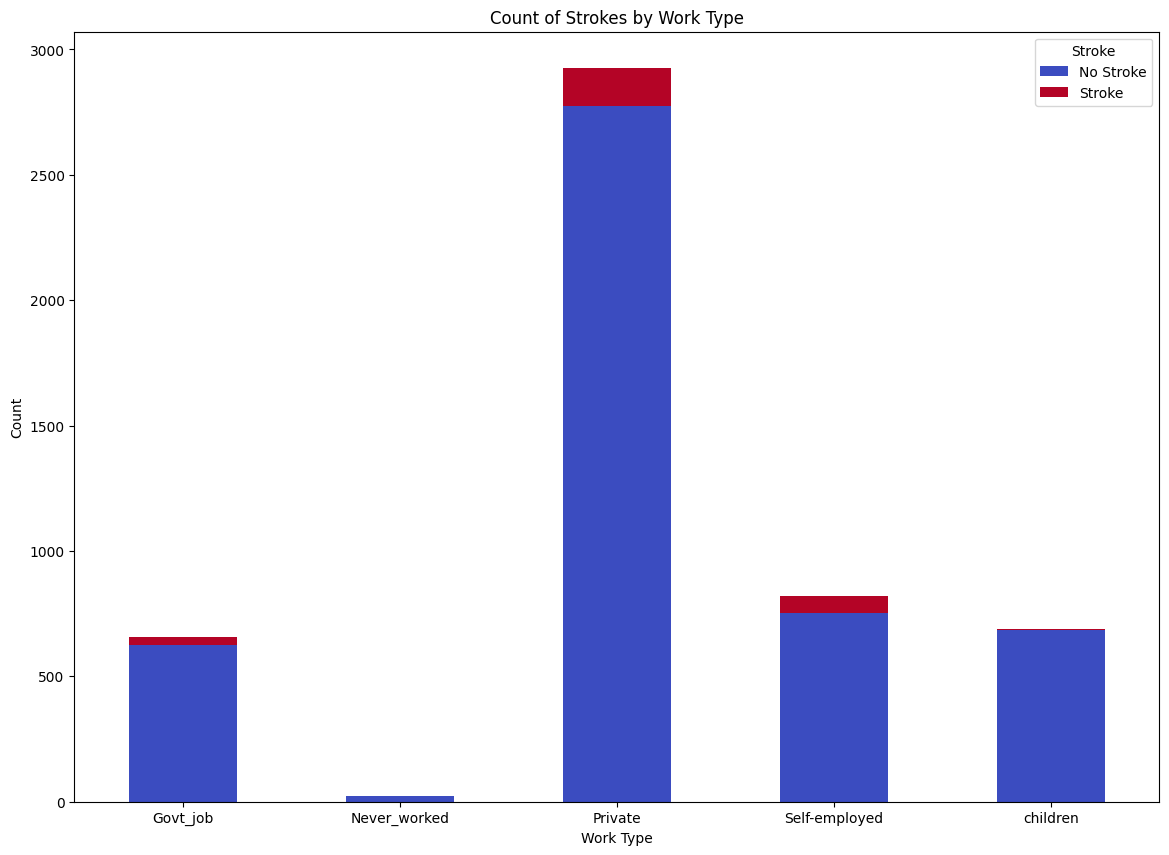

In [ ]:
# Plotting
stroke_counts_work_type.plot(kind='bar', stacked=True, rot=0, colormap='coolwarm', figsize=(14, 10))
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.title('Count of Strokes by Work Type')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

###1.4.8 *Residence Type*


---




In [ ]:
# Counting the occurrences
data['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

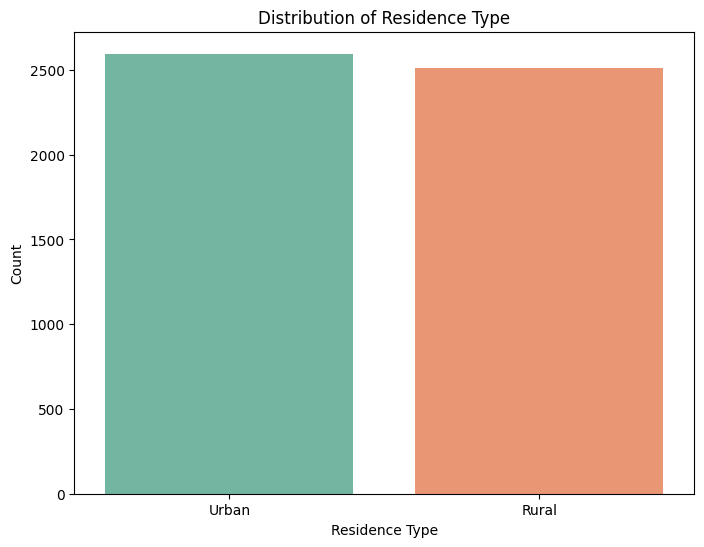

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_type', data=data, palette='Set2')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.title('Distribution of Residence Type')
plt.show()

In [ ]:
# Counting of strokes by residence type
data.groupby('Residence_type')['stroke'].value_counts().unstack()

stroke,0,1
Residence_type,,
Rural,2400,114
Urban,2461,135


In [ ]:
#creating the variable to plot
stroke_counts_Residence_type = data.groupby('Residence_type')['stroke'].value_counts().unstack()

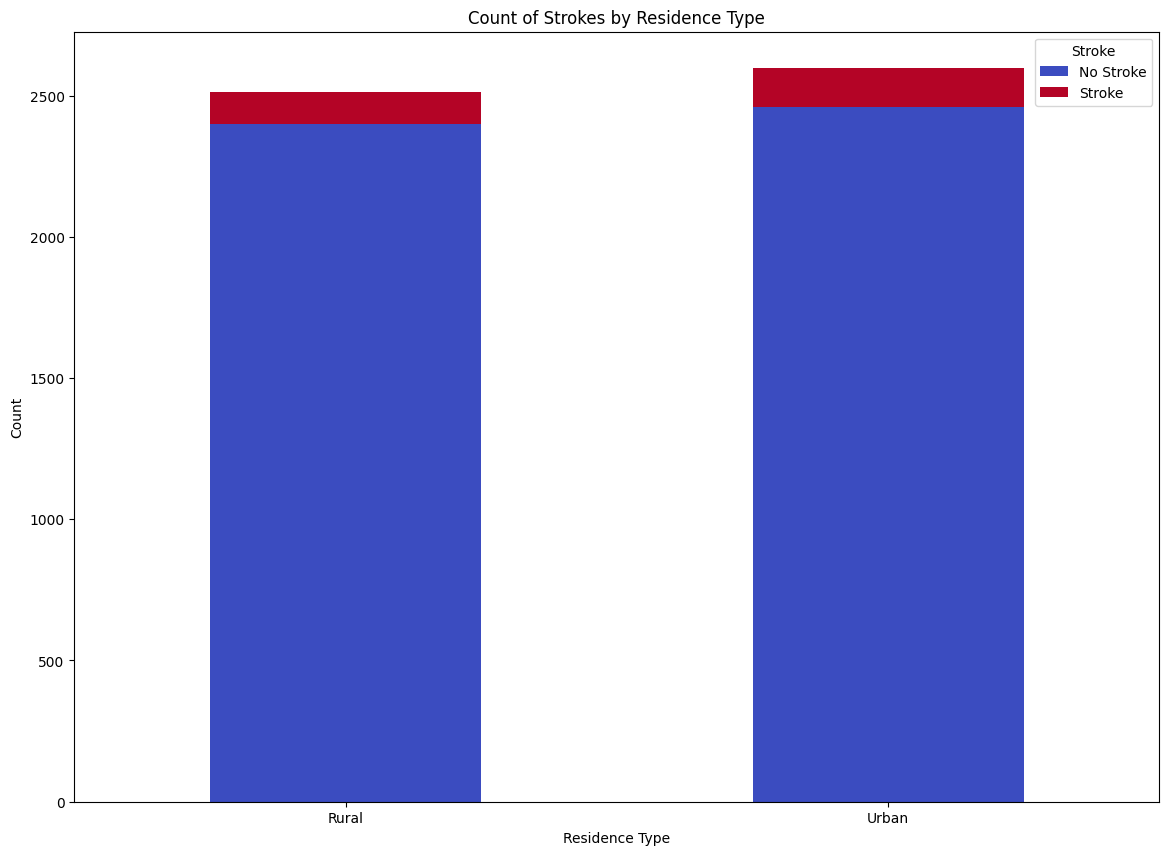

In [ ]:
# Plotting
stroke_counts_Residence_type.plot(kind='bar', stacked=True, rot=0, colormap='coolwarm', figsize=(14, 10))
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.title('Count of Strokes by Residence Type')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

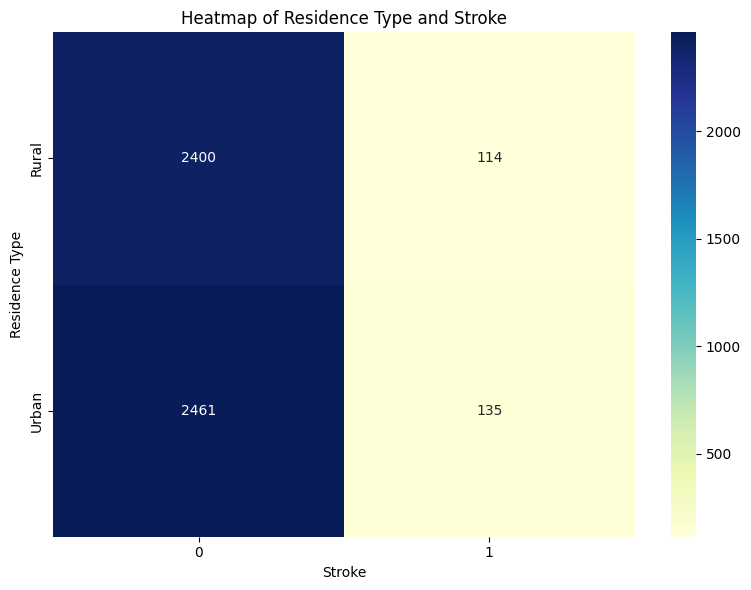

In [ ]:
# Calculate counts
cross_tab = pd.crosstab(data['Residence_type'], data['stroke'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# Customize chart
plt.title('Heatmap of Residence Type and Stroke')
plt.xlabel('Stroke')
plt.ylabel('Residence Type')

# Show plot
plt.tight_layout()
plt.show()

###1.4.9 *Avg Glucose Level*


---




In [ ]:
# Counting the occurrences
data['avg_glucose_level'].value_counts()

avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979, dtype: int64

In [ ]:
# Counting of strokes by avg glucose level
data.groupby('avg_glucose_level')['stroke'].value_counts().unstack()

stroke,0,1
avg_glucose_level,,
55.12,1.0,NaN
55.22,1.0,NaN
55.23,1.0,NaN
55.25,1.0,NaN
55.26,1.0,NaN
...,...,...
266.59,1.0,NaN
267.60,1.0,NaN
267.61,1.0,NaN


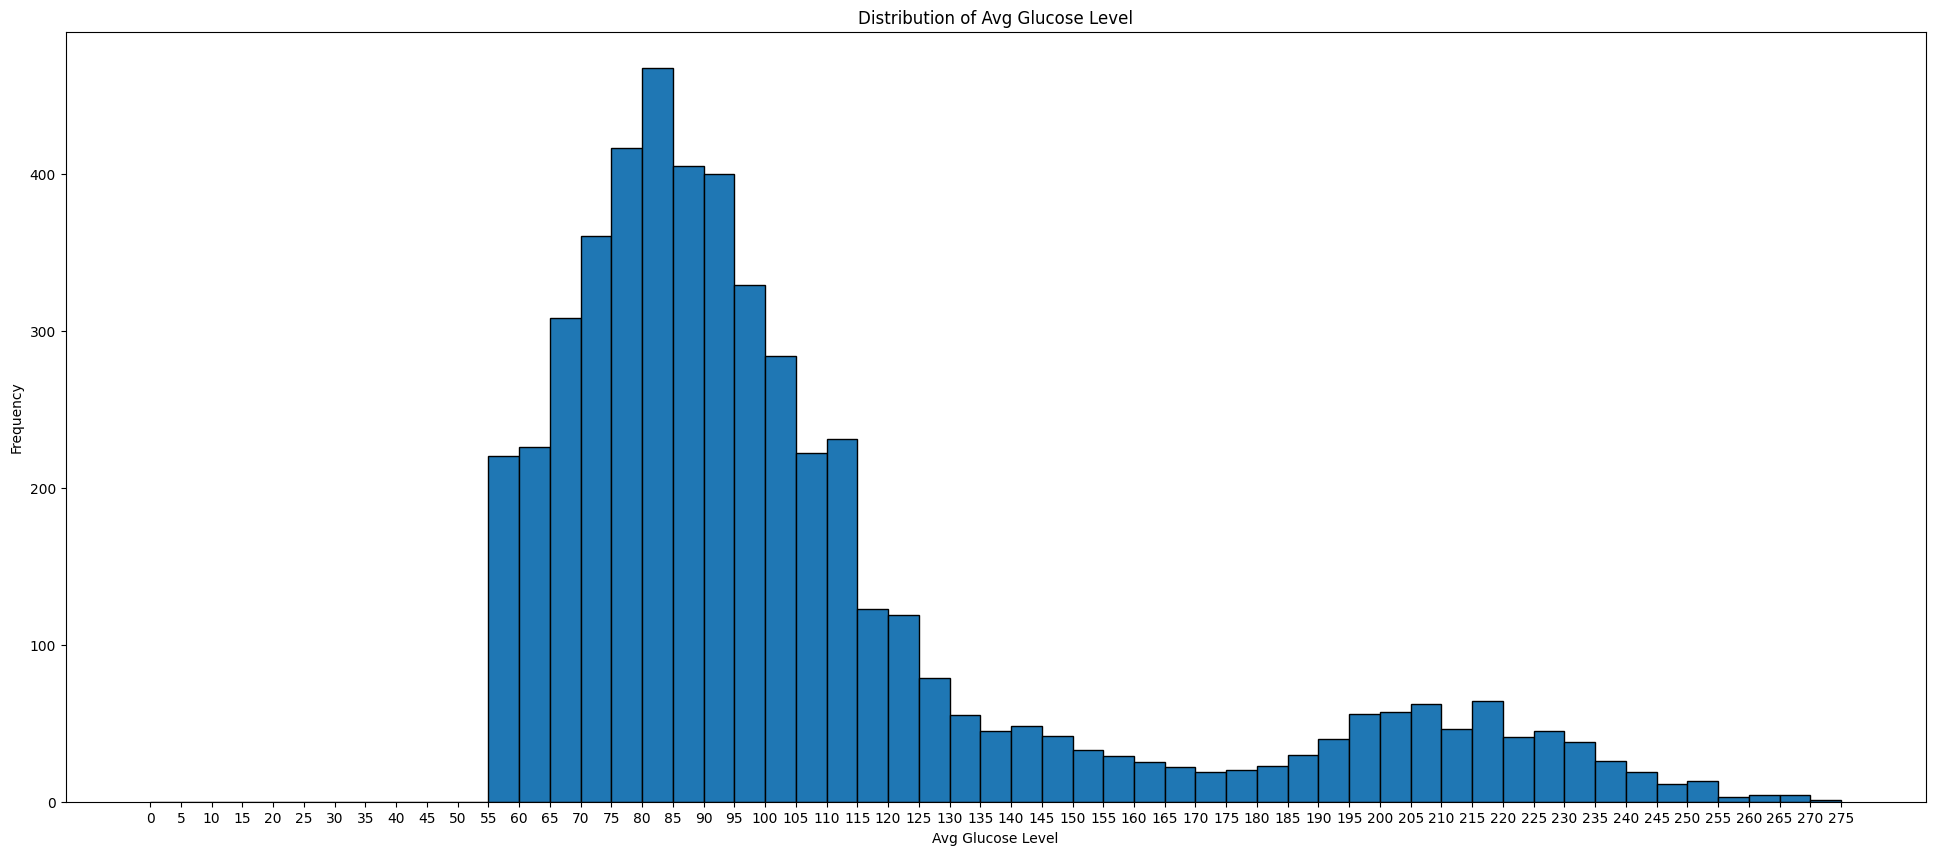

In [ ]:
# Plotting a histogram of 'avg glucose level'
bins = range(0, int(data['avg_glucose_level'].max())+ 6, 5)

# Plotting a histogram of 'avg glucose level' with specified bins
plt.figure(figsize=(24, 10))
plt.hist(data['avg_glucose_level'], bins=bins, edgecolor='black')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Avg Glucose Level')
plt.xticks(bins)
plt.show()

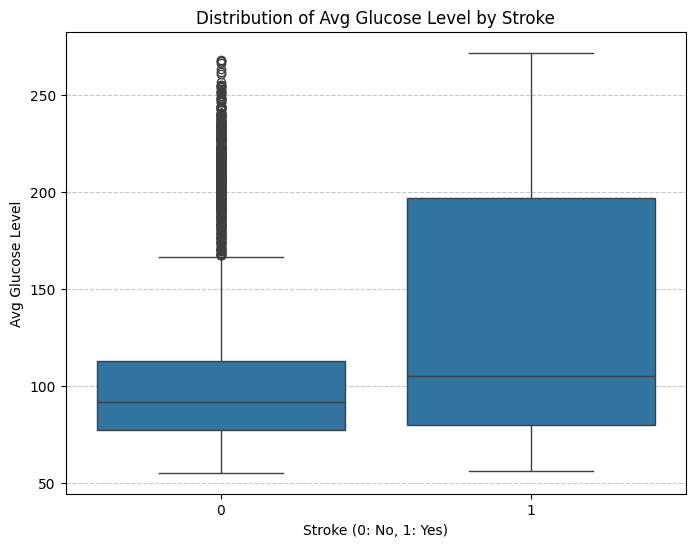

In [ ]:
# Creating a box plot to compare the distribution of Avg Glucose Level by stroke
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Avg Glucose Level')
plt.title('Distribution of Avg Glucose Level by Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

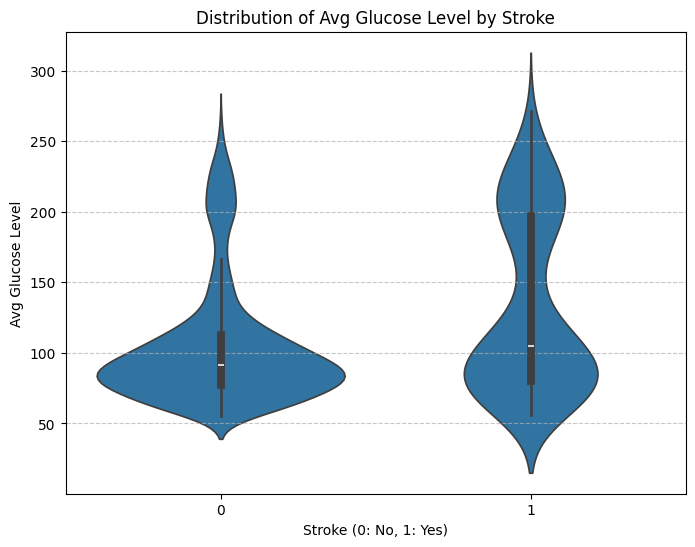

In [ ]:
# Create a violin plot to compare the distribution of Avg Glucose Level by stroke
plt.figure(figsize=(8, 6))
sns.violinplot(x='stroke', y='avg_glucose_level', data=data)
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Avg Glucose Level')
plt.title('Distribution of Avg Glucose Level by Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

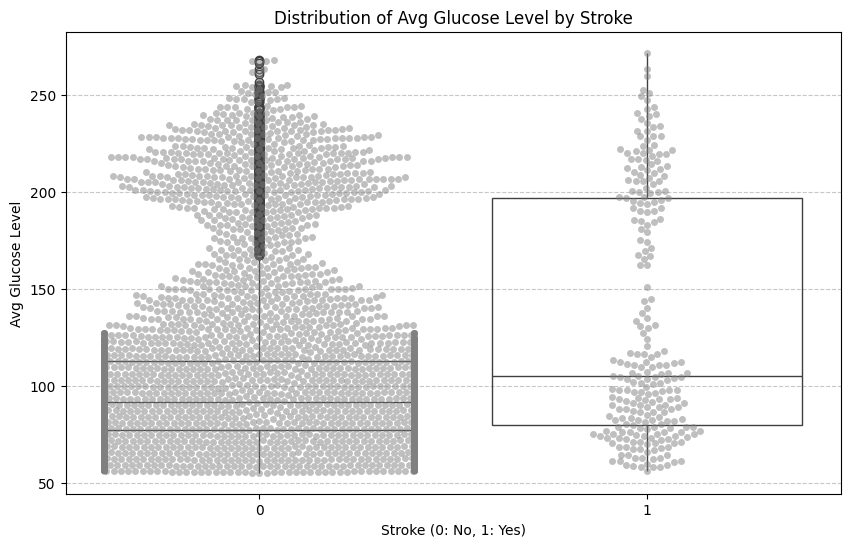

In [ ]:
# Create a combination plot (swarm plot + box plot) to compare Avg Glucose Level distribution by stroke
plt.figure(figsize=(10, 6))
sns.swarmplot(x='stroke', y='avg_glucose_level', data=data, color='grey', alpha=0.5)
sns.boxplot(x='stroke', y='avg_glucose_level', data=data, showcaps=False, boxprops={'facecolor':'None'})
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Avg Glucose Level')
plt.title('Distribution of Avg Glucose Level by Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###1.4.10 *BMI*


---




In [ ]:
# Counting the occurrences
data['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [ ]:
# Counting of strokes by bmi
data.groupby('bmi')['stroke'].value_counts().unstack()

stroke,0,1
bmi,,
10.3,1.0,NaN
11.3,1.0,NaN
11.5,1.0,NaN
12.0,1.0,NaN
12.3,1.0,NaN
...,...,...
66.8,1.0,NaN
71.9,1.0,NaN
78.0,1.0,NaN


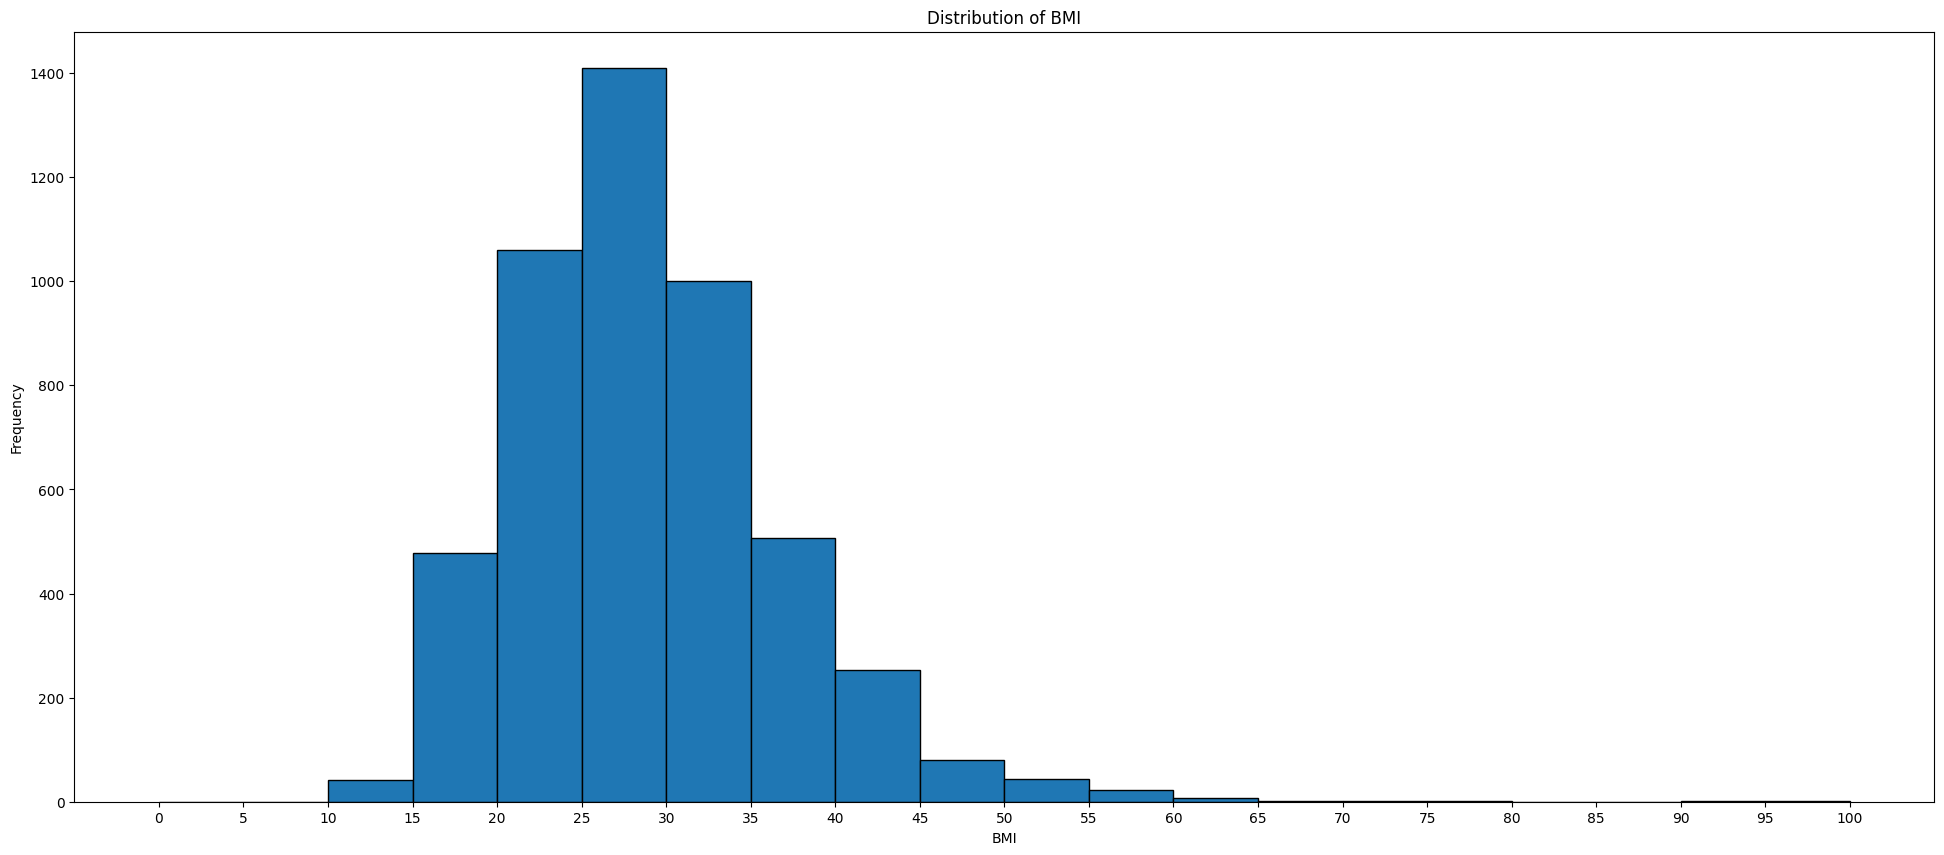

In [ ]:
# Plotting a histogram of bmi
bins = range(0, int(data['bmi'].max())+ 6, 5)

# Plotting a histogram of bmi with specified bins
plt.figure(figsize=(24, 10))
plt.hist(data['bmi'], bins=bins, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.xticks(bins)
plt.show()

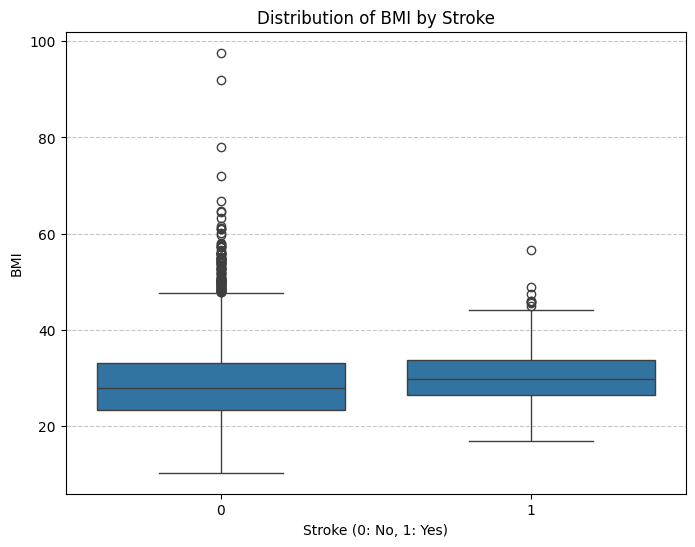

In [ ]:
# Creating a box plot to compare the distribution of BMI by stroke
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='bmi', data=data)
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

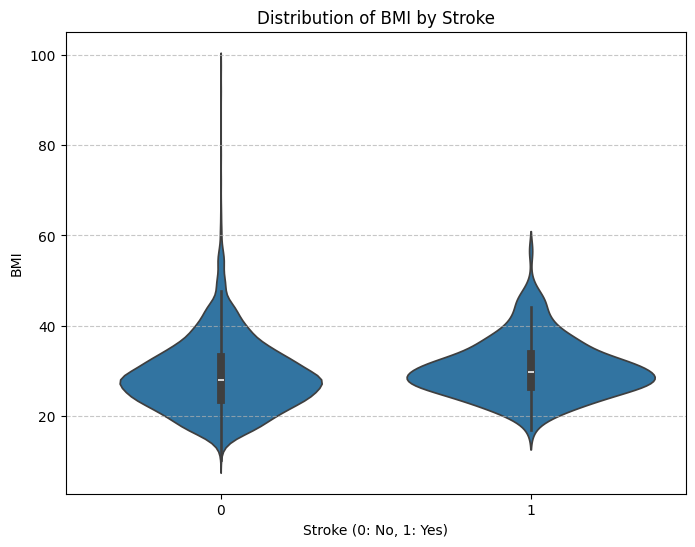

In [ ]:
# Create a violin plot to compare the distribution of BMI by stroke
plt.figure(figsize=(8, 6))
sns.violinplot(x='stroke', y='bmi', data=data)
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

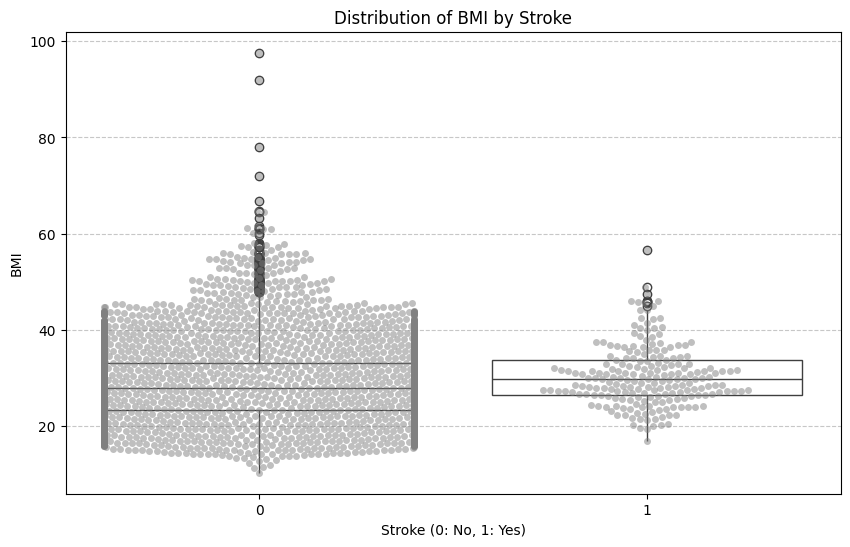

In [ ]:
# Create a combination plot (swarm plot + box plot) to compare Avg Glucose Level distribution by stroke
plt.figure(figsize=(10, 6))
sns.swarmplot(x='stroke', y='bmi', data=data, color='grey', alpha=0.5)
sns.boxplot(x='stroke', y='bmi', data=data, showcaps=False, boxprops={'facecolor':'None'})
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Stroke')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###1.4.11 *Smoking Status*


---




In [ ]:
# Counting the occurrences
data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

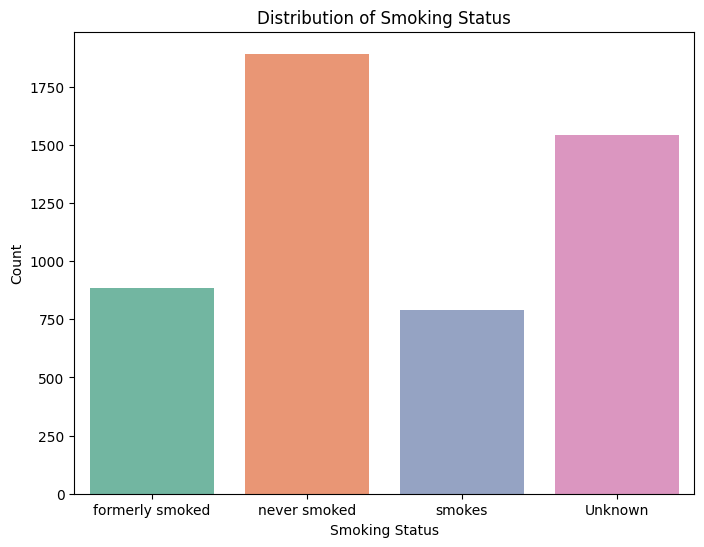

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', data=data, palette='Set2')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Distribution of Smoking Status')
plt.show()

In [ ]:
# Counting of strokes by smoking status
data.groupby('smoking_status')['stroke'].value_counts().unstack()

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


In [ ]:
#creating the variable to plot
stroke_counts_smoking_status = data.groupby('smoking_status')['stroke'].value_counts().unstack()

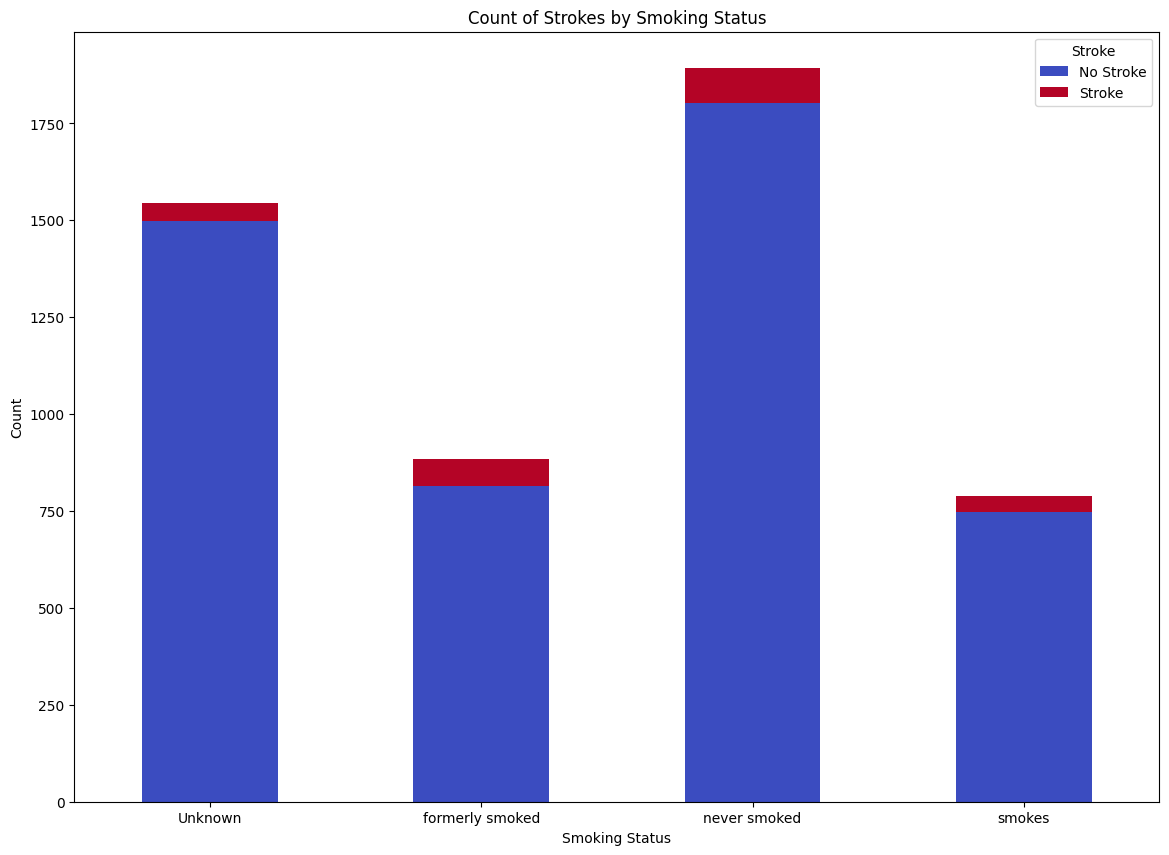

In [ ]:
# Plotting
stroke_counts_smoking_status.plot(kind='bar', stacked=True, rot=0, colormap='coolwarm', figsize=(14, 10))
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Count of Strokes by Smoking Status')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

###1.5 Multivariate Analysis in General (Without Stroke)


---



Correlation Matrix

---> The coefficient indicates both the strength (how closely the variables are related) and the direction (positive or negative correlation) of the relationship between pairs of variables.

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                     age  hypertension  heart_disease  \
age                             1.000000      0.276398       0.263796   
hypertension                    0.276398      1.000000       0.108306   
heart_disease                   0.263796      0.108306       1.000000   
avg_glucose_level               0.238171      0.174474       0.161857   
bmi                             0.333398      0.167811       0.041357   
stroke                          0.245257      0.127904       0.134914   
gender_Female                   0.027924     -0.021143      -0.085617   
gender_Male                    -0.027623      0.021275       0.085717   
gender_Other                   -0.010659     -0.004597      -0.003343   
ever_married_No                -0.679125     -0.164243      -0.114644   
ever_married_Yes                0.679125      0.164243       0.114644   
work_type_Govt_job              0.130013      0.017685       0.001330   
work_type_Never_worked         

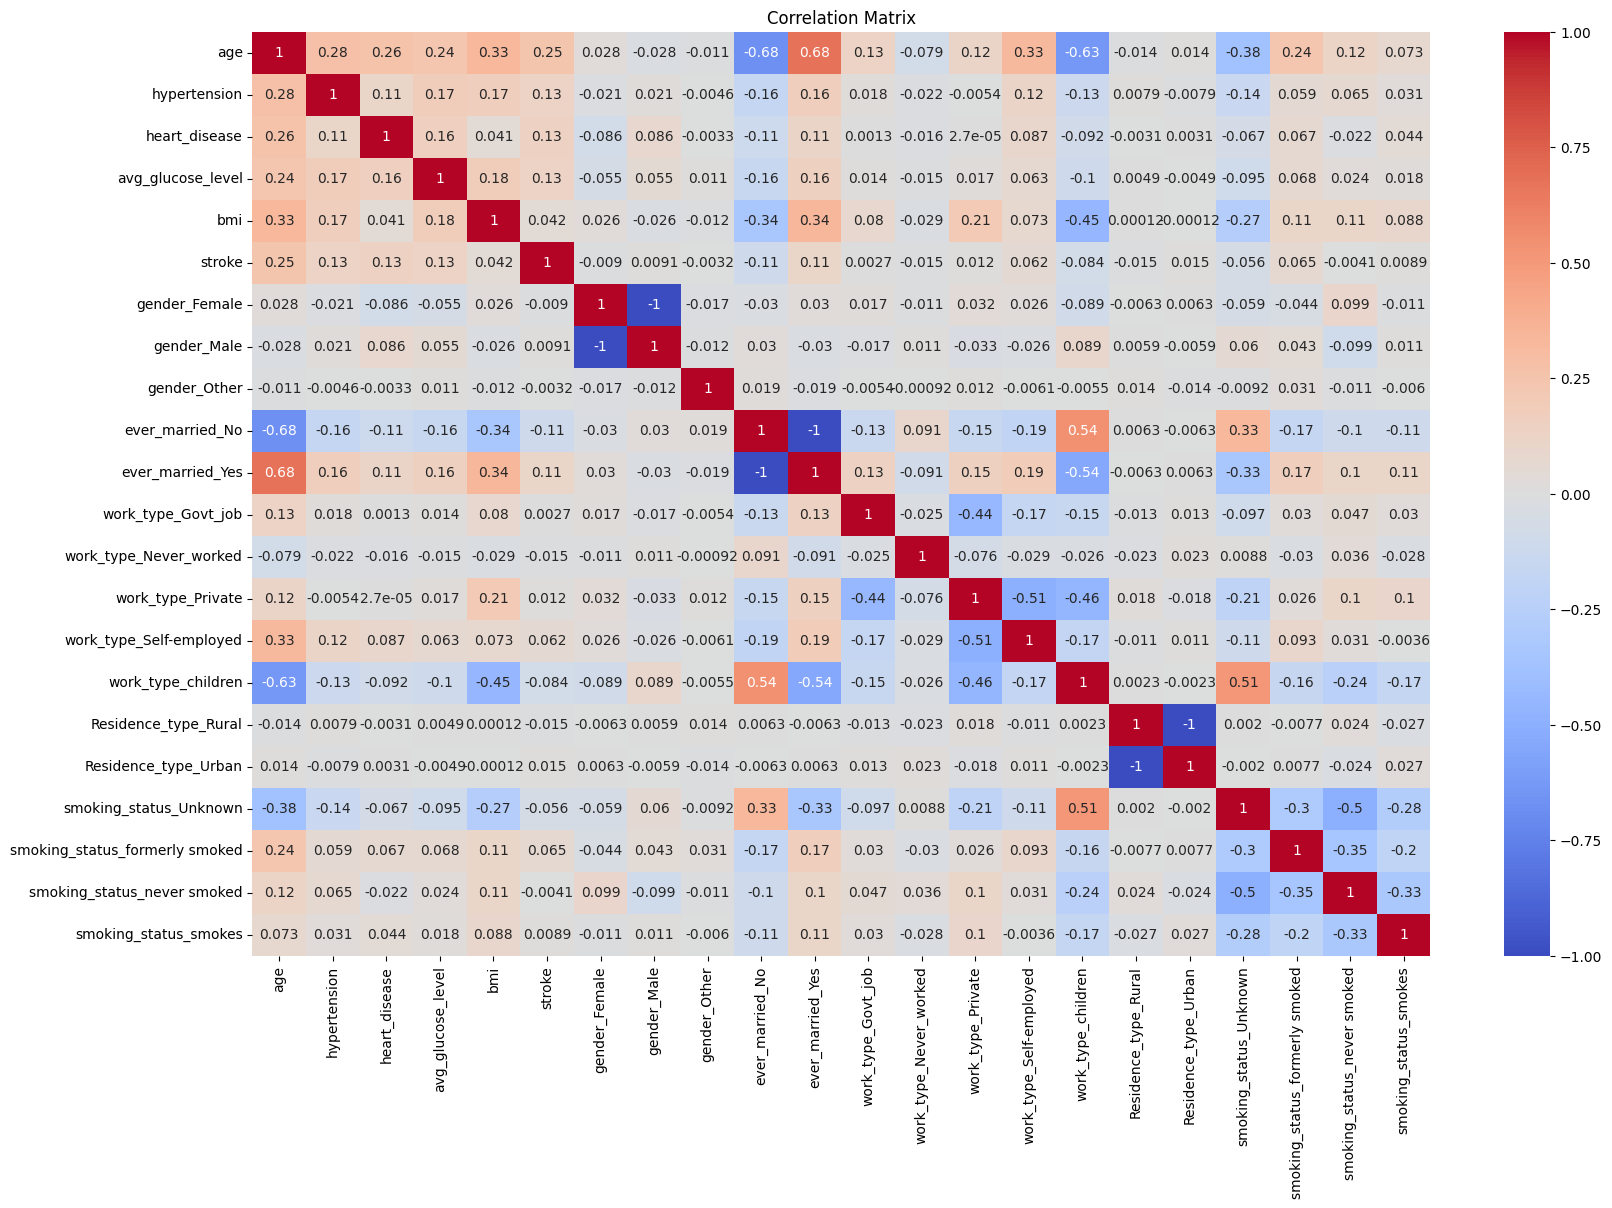

In [ ]:
# Create a heatmap
plt.figure(figsize=(19, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

###2.1 Removing id column


In [ ]:
data.drop('id', axis=1, inplace=True)

---> checking if id column was removed

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###2.2 Encoding & One-Hot Encoding

In [ ]:
# encoding

X = pd.DataFrame(data, columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','avg_glucose_level','bmi','smoking_status'])

# Convert 'ever_married' column to a Pandas Series
ever_married_series = pd.Series(X['ever_married'])

# Replace 'Yes' with 1 and 'No' with 0
ever_married_series = ever_married_series.replace({'Yes': 1, 'No': 0})

# Assign the modified Series back to the DataFrame
X['ever_married'] = ever_married_series

In [ ]:
# Categorical into dummies (one-hot encoding)

data['smoking_status'] = data['smoking_status'].astype('category')
data['work_type'] = data['work_type'].astype('category')
data['gender'] = data['gender'].astype('category')
data['Residence_type'] = data['Residence_type'].astype('category')
data = pd.get_dummies(data)

---> checking if the above executed properly

In [ ]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,NaN,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   bool   
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   ever_married_No                 5110 non-null   bool   
 10  ever_married_Yes                5110 non-null   bool   
 11  work_type_Govt_job              5110 non-null   bool   
 12  work_type_Never_worked          51

### 2.3 Handling NaN values

---> percentage of NaN values in the whole dataset.

In [ ]:
# Calculate percentage of NaN values in the whole DataFrame
nan_percentage = data.isna().mean().mean() * 100

# Display the percentage of NaN values
print(f"Percentage of NaN values in the dataset: {nan_percentage:.2f}%")

Percentage of NaN values in the dataset: 0.18%


---> percentage of NaN values in the bmi column

In [ ]:
# Calculate percentage of NaN values in the 'bmi' column
bmi_nan_percentage = data['bmi'].isna().mean() * 100

# Display the percentage of NaN values in the 'bmi' column
print(f"Percentage of NaN values in the 'bmi' column: {bmi_nan_percentage:.2f}%")

Percentage of NaN values in the 'bmi' column: 3.93%


---> number of stroke cases with NaN values

In [ ]:
# Count rows where 'bmi' is NaN and 'stroke' is 1
rows_with_nan_and_stroke = data[data['bmi'].isna() & (data['stroke'] == 1)]

# Number of rows
num_rows_with_nan_and_stroke = rows_with_nan_and_stroke.shape[0]

# Display the number of rows where 'bmi' is NaN and 'stroke' is 1
print(f"Number of rows where 'bmi' is NaN and 'stroke' is 1: {num_rows_with_nan_and_stroke}")

Number of rows where 'bmi' is NaN and 'stroke' is 1: 40


---> percentage of stroke cases with NaN values out of all cases of stroke

In [ ]:
# Count total rows where 'stroke' is 1
total_stroke_cases = data[data['stroke'] == 1].shape[0]

# Count rows where 'bmi' is NaN and 'stroke' is 1
rows_with_nan_and_stroke = data[data['bmi'].isna() & (data['stroke'] == 1)]
num_rows_with_nan_and_stroke = rows_with_nan_and_stroke.shape[0]

# Calculate percentage
percentage_nan_in_stroke_cases = (num_rows_with_nan_and_stroke / total_stroke_cases) * 100

# Display the percentage
print(f"Percentage of rows where 'bmi' is NaN among stroke cases: {percentage_nan_in_stroke_cases:.2f}%")

Percentage of rows where 'bmi' is NaN among stroke cases: 16.06%


---> correlation between bmi & stroke

In [ ]:
# Calculate correlation between 'bmi' and 'stroke' columns
correlation = data['bmi'].corr(data['stroke'])

# Display the correlation coefficient
print(f"Correlation between 'bmi' and 'stroke': {correlation}")

Correlation between 'bmi' and 'stroke': 0.04237366114923359


Observation:

---> The correlation coefficient of 0.04237366114923359 between 'bmi' and 'stroke' suggests a very weak positive correlation between these two variables in your dataset.

---> In summary, while there is a positive correlation between BMI and stroke in your dataset, it is very weak. This means that BMI alone is not a strong predictor of stroke risk in this context.
